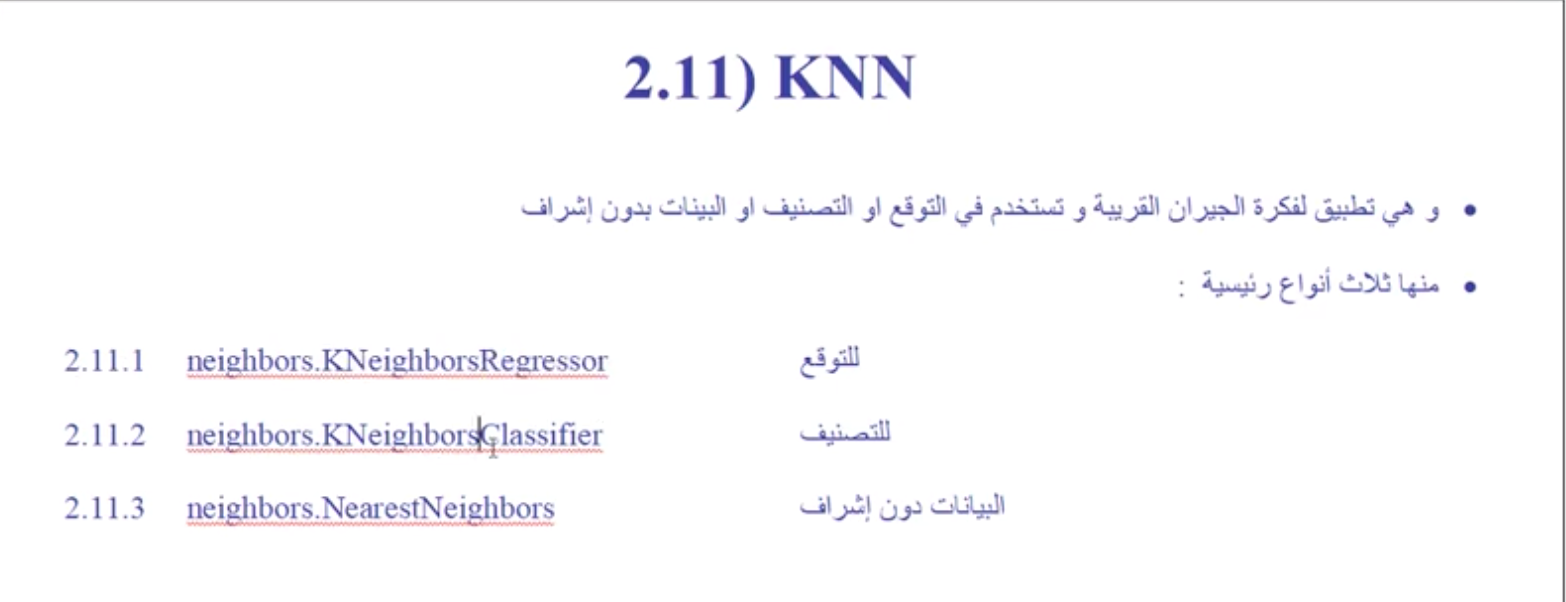

In [1]:
from IPython.display import Image
Image(filename= '1.png')

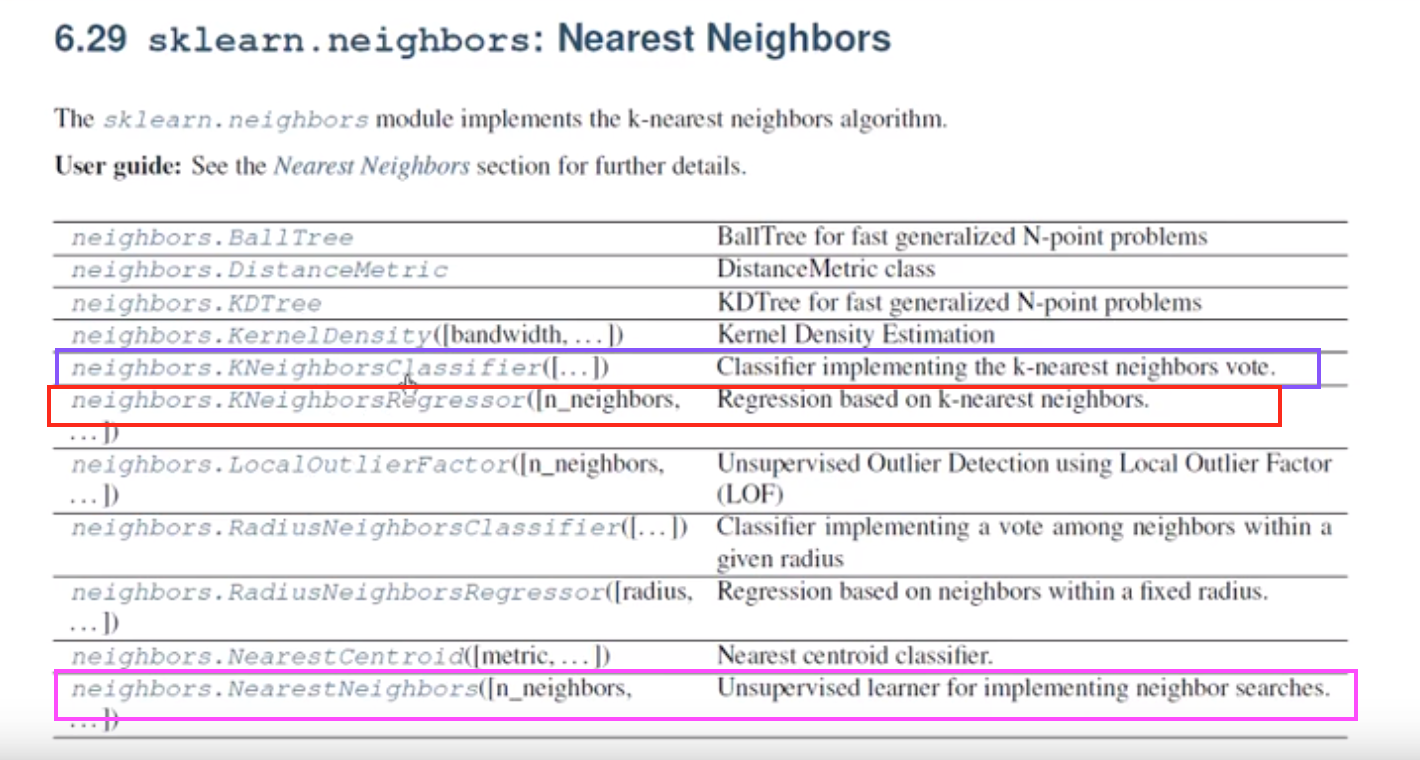

In [2]:
Image(filename= '2.png')

# KNN
* used for
* 1- Regression
* 2- Classification
* 3- Un supervised

In [59]:
#Import Libraries
from sklearn.datasets import load_boston, load_iris, load_breast_cancer

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors

from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error
from sklearn.metrics import confusion_matrix, accuracy_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 1- KNN for Regression

In [6]:
#Applying KNeighborsRegressor Model 

'''
#sklearn.neighbors.KNeighborsRegressor(n_neighbors=5, weights=, algorithm=’auto’, leaf_size=30,
#                                      p=2, metric=’minkowski’, metric_params=None,n_jobs=None)
'''


'\n#sklearn.neighbors.KNeighborsRegressor(n_neighbors=5, weights=, algorithm=’auto’, leaf_size=30,\n#                                      p=2, metric=’minkowski’, metric_params=None,n_jobs=None)\n'

### Example 1

In [8]:
# load data
data = load_boston()
X = data.data
y = data.target

In [9]:
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)


In [23]:
#Applying KNeighborsRegressor Model 
knn_model = KNeighborsRegressor(n_neighbors = 2, weights='uniform', #also can be : distance, or defined function 
                                               algorithm = 'auto')    #also can be : ball_tree ,  kd_tree  , brute
knn_model.fit(X_train, y_train)


In [24]:
#Calculating Details
print('KNeighborsRegressorModel Train Score is : ' , knn_model.score(X_train, y_train))
print('KNeighborsRegressorModel Test Score is : ' , knn_model.score(X_test, y_test))


KNeighborsRegressorModel Train Score is :  0.8408991473981857
KNeighborsRegressorModel Test Score is :  0.5211035792524306


In [25]:
#Calculating Prediction
y_pred = knn_model.predict(X_test)


In [27]:
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_pred) # it can be raw_values
print('Mean Absolute Error Value is : ', MAEValue)

#----------------------------------------------------
#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred) # it can be raw_values
print('Mean Squared Error Value is : ', MSEValue)

#----------------------------------------------------
#Calculating Median Squared Error
MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Squared Error Value is : ', MdSEValue )

Mean Absolute Error Value is :  4.427844311377246
Mean Squared Error Value is :  47.10321856287425
Median Squared Error Value is :  2.6000000000000014


### Example 2

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))


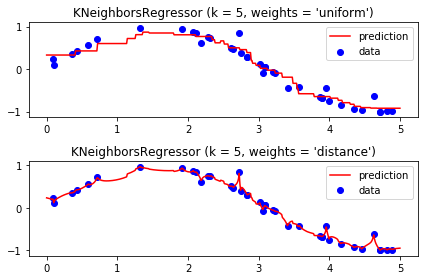

In [29]:
# Fit regression model
n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, c='b', label='data')
    plt.plot(T, y_, c='r', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.tight_layout()
plt.show()

### Example 3

In [33]:
data = pd.read_csv('houses.csv')
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,price
0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,22.19
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,53.80
2,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,18.00
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,60.40
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,51.00


In [37]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer()
data = imp.fit_transform(data)


In [38]:
X = data[:,:-1]
y = data[:,-1]


In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [43]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [44]:
mean_absolute_error(y_test, y_pred)

9.299574242424242

In [45]:
mean_squared_error(y_pred, y_test)

268.5487255578824

## 2- KNN for Classification

### Example 1

In [47]:
#load breast cancer data

BreastData = load_breast_cancer()
#X Data
X = BreastData.data

#y Data
y = BreastData.target

In [48]:
#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)


In [49]:
#Applying KNeighborsClassifier Model 
KNNClassifierModel = KNeighborsClassifier(n_neighbors= 5,weights ='uniform', # it can be distance
                                          algorithm='auto') # it can be ball_tree, kd_tree,brute
KNNClassifierModel.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [50]:
#Calculating Details
print('KNNClassifierModel Train Score is : ' , KNNClassifierModel.score(X_train, y_train))
print('KNNClassifierModel Test Score is : ' , KNNClassifierModel.score(X_test, y_test))


KNNClassifierModel Train Score is :  0.9343832020997376
KNNClassifierModel Test Score is :  0.9468085106382979


In [53]:
#Calculating Prediction
y_pred = KNNClassifierModel.predict(X_test)
y_pred_prob = KNNClassifierModel.predict_proba(X_test)
print('Prediction Probabilities Value for KNNClassifierModel is : ' , y_pred_prob[:10])


Prediction Probabilities Value for KNNClassifierModel is :  [[0.8 0.2]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [0.4 0.6]
 [0.4 0.6]
 [0.  1. ]
 [0.8 0.2]
 [1.  0. ]
 [0.  1. ]]


Confusion Matrix is : 
 [[ 65   3]
 [  7 113]]


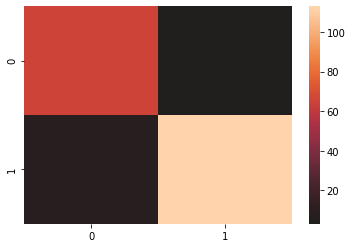

In [54]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True)


### Example 2

In [56]:
iris = load_iris()
X = iris.data
y = iris.target


In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.4,random_state = 0)


Text(0, 0.5, 'testing accuracy')

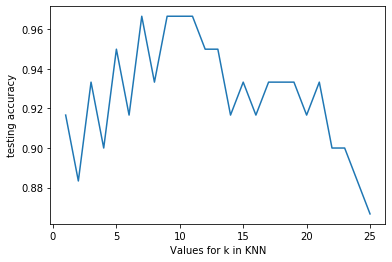

In [64]:
k_range = range(1,26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_train , y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test , y_pred) )
    
    

plt.plot(k_range , scores)
plt.xlabel('Values for k in KNN')
plt.ylabel('testing accuracy')


### Example 3

In [65]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [66]:
X = df.drop(columns=['Outcome'])
X.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [67]:
y = df['Outcome'].values
y[0:5]

array([1, 0, 1, 0, 1])

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)


In [72]:
knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)


In [73]:
knn.score(X_test, y_test)


0.6688311688311688

In [74]:
from sklearn.model_selection import cross_val_score
knn_cv = KNeighborsClassifier(n_neighbors=3)

cv_scores = cross_val_score(knn_cv, X, y, cv=5)

print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))
 

[0.68181818 0.69480519 0.75324675 0.75163399 0.68627451]
cv_scores mean:0.7135557253204311


# 3- Nearest Neighbor

In [76]:
#Applying NearestNeighborsModel Model 

'''
#sklearn.neighbors.NearestNeighbors(n_neighbors=5, radius=1.0, algorithm='auto’,leaf_size=30, 
#                                   metric='minkowski’, p=2, metric_params=None, n_jobs=None)
'''


"\n#sklearn.neighbors.NearestNeighbors(n_neighbors=5, radius=1.0, algorithm='auto’,leaf_size=30, \n#                                   metric='minkowski’, p=2, metric_params=None, n_jobs=None)\n"

### Example 1

In [78]:
#reading data
data = pd.read_csv('data.csv')
#X Data
X = data
data.describe()


,0,1,2,3,4,5,6,7
count,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03
mean,-2.368221e-11,-2.291823e-12,7.639431e-12,3.819705e-12,3.819709e-12,2.444614e-11,-2.902980e-11,1.222307e-11
std,1.917490e+00,1.633490e+00,1.120277e+00,1.073415e+00,8.484723e-01,7.963570e-01,7.837269e-01,7.496296e-01
min,-2.343054e+00,-5.895619e+00,-3.785076e+00,-5.443483e+00,-3.929435e+00,-2.514852e+00,-2.399253e+00,-4.959774e+00
25%,-1.638221e+00,-9.607650e-01,-5.837243e-01,-5.062350e-01,-4.905089e-01,-4.722723e-01,-4.604733e-01,-4.428151e-01
50%,-5.167353e-01,-3.189201e-01,4.969400e-02,1.880785e-01,3.376454e-02,-2.054734e-02,2.479064e-02,5.398186e-02
75%,1.326847e+00,6.082356e-01,8.704473e-01,5.425078e-01,4.565319e-01,5.822781e-01,4.426679e-01,4.456012e-01
max,7.287744e+00,3.949870e+00,3.230730e+00,2.816763e+00,3.037647e+00,2.819698e+00,4.367357e+00,3.555232e+00


In [79]:
#Applying NearestNeighborsModel Model 
NearestNeighborsModel = NearestNeighbors(n_neighbors=4,radius=1.0,algorithm='auto')#it can be:ball_tree,kd_tree,brute
NearestNeighborsModel.fit(X)


NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                 radius=1.0)

In [81]:
#Calculating Details
print('NearestNeighborsModel Train kneighbors are : \n' , NearestNeighborsModel.kneighbors(X_train[: 5]))
print('NearestNeighborsModel Train radius kneighbors are : \n' , NearestNeighborsModel.radius_neighbors(X_train[:  1]))

print('NearestNeighborsModel Test kneighbors are : \n' , NearestNeighborsModel.kneighbors(X_test[: 5]))
print('NearestNeighborsModel Test  radius kneighbors are : \n' , NearestNeighborsModel.radius_neighbors(X_test[:  1]))


NearestNeighborsModel Train kneighbors are : 
 (array([[134.17023471, 134.97405223, 135.0067388 , 135.11057412],
       [363.63405   , 363.89867991, 363.89867991, 364.0041576 ],
       [197.24007433, 197.38812757, 197.4375623 , 197.47532579],
       [136.68157295, 137.58957009, 137.7992326 , 137.8051045 ],
       [125.14364269, 125.76223969, 125.85446996, 126.06104596]]), array([[ 867,  414, 1177, 1214],
       [  57,  493, 1133, 1117],
       [  57,  322, 1117, 1190],
       [ 867,  954, 1177, 1214],
       [ 867,  954, 1247, 1214]]))
NearestNeighborsModel Train radius kneighbors are : 
 (array([array([], dtype=float64)], dtype=object), array([array([], dtype=int64)], dtype=object))
NearestNeighborsModel Test kneighbors are : 
 (array([[125.32095913, 125.89038667, 125.99767896, 126.09257845],
       [173.19300308, 173.21824273, 173.26308259, 173.27526404],
       [129.74599795, 129.91193022, 130.0537834 , 130.10527092],
       [123.07709052, 123.27961085, 123.30103411, 123.3414818 ],


### Example 2

In [85]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors

data = pd.read_csv('data.csv')

neigh = NearestNeighbors(2, 0.4)
neigh.fit(data)

data.head()


,0,1,2,3,4,5,6,7
0,-2.084839,-0.471673,-0.955542,-0.567288,-0.953226,-1.510386,0.921728,0.437954
1,0.003700,-0.999118,0.202003,1.612001,-0.375642,0.378518,0.113693,1.718011
2,-1.456240,0.483522,-0.508605,-0.316406,-1.695560,-1.943310,0.299486,0.147370
3,-1.595524,-0.219744,1.039403,0.381587,0.109094,-0.155068,0.156054,0.007314
4,0.995277,-1.517259,-0.101198,1.415742,-0.054356,0.611216,0.196938,0.641809


In [87]:
l =[-2,.5,-0.8,1.1,1.5,0.1,-1,2]

result = neigh.kneighbors([l],n_neighbors= 2) # returns distance nd index
result

(array([[2.82800486, 2.82800486]]), array([[1225,  432]]))